# Toxic comment classification challenge

## preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

#loading the train data
data=pd.read_csv('/content/drive/MyDrive/train.csv')
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
#test data
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')
test_data

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


Let's check if there are any null values in the data

In [5]:
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

## exploratory data analysis

There are some comments which have more than one labels. Let's check how many comments have multiple labels.

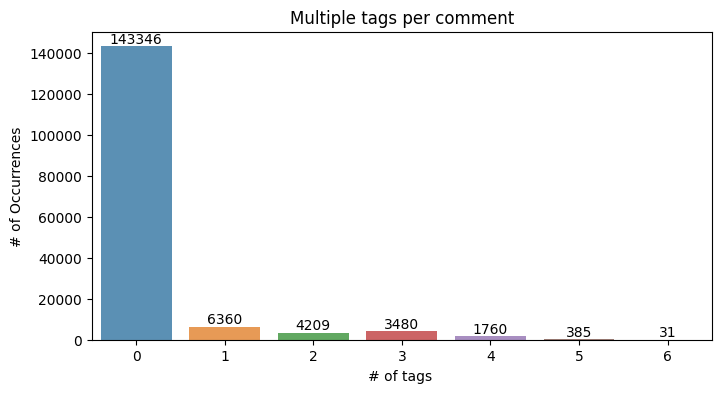

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
rowsums=data.iloc[:,2:].sum(axis=1)
p=rowsums.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x=p.index, y=p.values, alpha=0.8)
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences')
plt.xlabel('# of tags ')

#adding the text labels
rects = ax.patches
labels = p.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

plt.show()

we can see above that no. of comments without any label are far greater than the comments with some label.

Now let's check how many comments are labelled as a particular type of toxicity

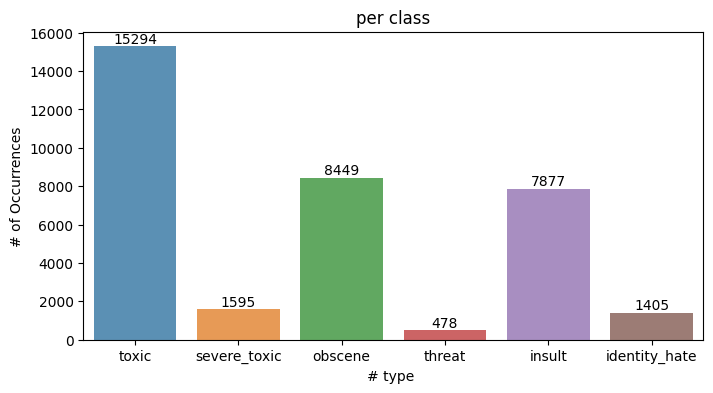

In [7]:
sum = data.iloc[:,2:].sum()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x=sum.index, y=sum, alpha=0.8)
plt.title("per class")
plt.ylabel('# of Occurrences')
plt.xlabel('# type ')

#adding the text labels
rects = ax.patches
labels = sum
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height , label, ha='center',
                                                               va='bottom')

plt.show()

Let's see the correlation between the labels

<Axes: >

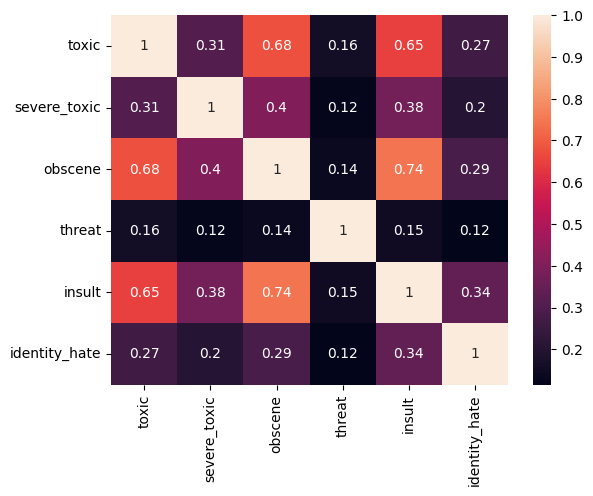

In [8]:
import seaborn as sns
labels=['toxic','severe_toxic','obscene','threat','insult','identity_hate']
sns.heatmap(data[labels].corr(),annot=True)

 word clouds 

wordcloud for all the comments

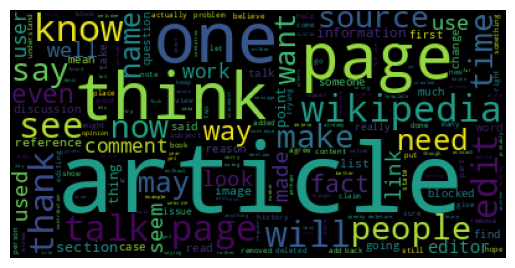

In [9]:
#A word cloud is a collection, or cluster, of words depicted in different sizes.
#The bigger and bolder the word appears, the more often it’s mentioned within a 
#given text and the more important it is.
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
for val in data.comment_text:
  val=str(val)
  tokens=val.split()
  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()
  comment_words+=" ".join(tokens)+" "
wordcloud=WordCloud(background_color='black',stopwords=stopwords).generate(
                                                              comment_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

word cloud for the comments labelled as toxic

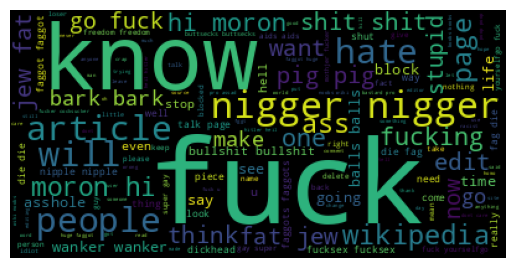

In [10]:
# Select only the comments labeled as "toxic"
toxic_comments = data[data.toxic == 1].comment_text

# Combine all the selected comments into a single string
toxic_comment_words = ' '.join(toxic_comments.values)

# Convert all the words to lowercase
toxic_comment_words = toxic_comment_words.lower()

# Create a set of stopwords to remove from the WordCloud
stopwords = set(STOPWORDS)

# Generate the WordCloud using the toxic comments and the set of stopwords
wordcloud = WordCloud(background_color='black', 
                        stopwords=stopwords).generate(toxic_comment_words)

# Display the WordCloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


wordcloud for the comments labelled as severe_toxic

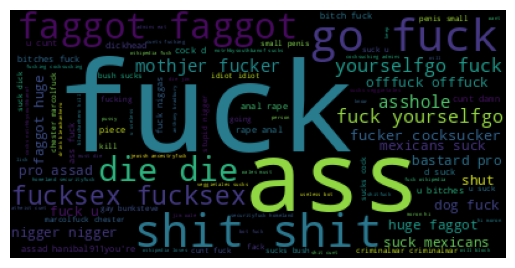

In [11]:
# Select only the comments labeled as "severe_toxic"
severe_toxic_comments = data[data.severe_toxic == 1].comment_text

# Combine all the selected comments into a single string
severe_toxic_comment_words = ' '.join(severe_toxic_comments.values)

# Convert all the words to lowercase
severe_toxic_comment_words = severe_toxic_comment_words.lower()

# Create a set of stopwords to remove from the WordCloud
stopwords = set(STOPWORDS)

# Generate the WordCloud using the toxic comments and the set of stopwords
wordcloud = WordCloud(background_color='black', 
                      stopwords=stopwords).generate(severe_toxic_comment_words)

# Display the WordCloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


wordcloud for the comments labelled as obscene

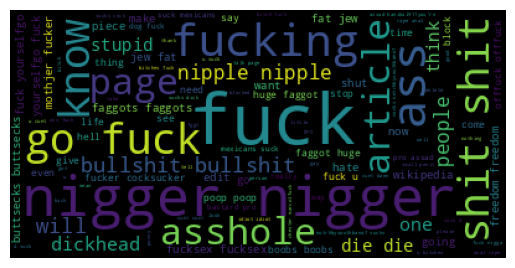

In [12]:
# Select only the comments labeled as "obscene"
obscene_comments = data[data.obscene == 1].comment_text

# Combine all the selected comments into a single string
obscene_comment_words = ' '.join(obscene_comments.values)

# Convert all the words to lowercase
obscene_comment_words = obscene_comment_words.lower()

# Create a set of stopwords to remove from the WordCloud
stopwords = set(STOPWORDS)

# Generate the WordCloud using the toxic comments and the set of stopwords
wordcloud = WordCloud(background_color='black',
                      stopwords=stopwords).generate(obscene_comment_words)

# Display the WordCloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


wordcloud for the comments labelled as threat

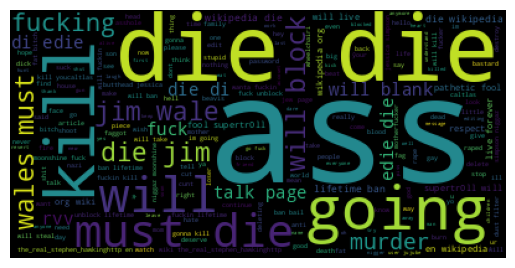

In [13]:
# Select only the comments labeled as "threat"
threat_comments = data[data.threat == 1].comment_text

# Combine all the selected comments into a single string
threat_comment_words = ' '.join(threat_comments.values)

# Convert all the words to lowercase
threat_comment_words = threat_comment_words.lower()

# Create a set of stopwords to remove from the WordCloud
stopwords = set(STOPWORDS)

# Generate the WordCloud using the toxic comments and the set of stopwords
wordcloud = WordCloud(background_color='black', 
                      stopwords=stopwords).generate(threat_comment_words)

# Display the WordCloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


wordcloud for the comments labelled as insult

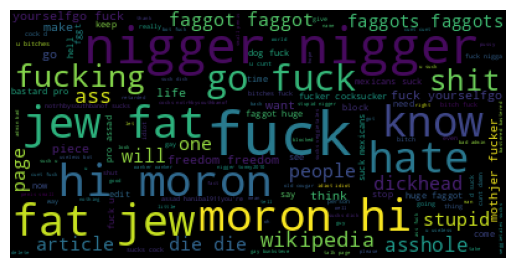

In [14]:
# Select only the comments labeled as "insult"
insult_comments = data[data.insult == 1].comment_text

# Combine all the selected comments into a single string
insult_comment_words = ' '.join(insult_comments.values)

# Convert all the words to lowercase
insult_comment_words = insult_comment_words.lower()

# Create a set of stopwords to remove from the WordCloud
stopwords = set(STOPWORDS)

# Generate the WordCloud using the toxic comments and the set of stopwords
wordcloud = WordCloud(background_color='black', 
                      stopwords=stopwords).generate(insult_comment_words)

# Display the WordCloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


wordcloud for the comments labelled as identity_hate

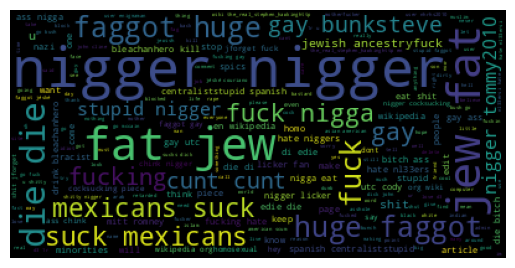

In [15]:
# Select only the comments labeled as "identity_hate"
identity_hate_comments = data[data.identity_hate == 1].comment_text

# Combine all the selected comments into a single string
identity_hate_comment_words = ' '.join(identity_hate_comments.values)

# Convert all the words to lowercase
identity_hate_comment_words = identity_hate_comment_words.lower()

# Create a set of stopwords to remove from the WordCloud
stopwords = set(STOPWORDS)

# Generate the WordCloud using the toxic comments and the set of stopwords
wordcloud = WordCloud(background_color='black', 
                      stopwords=stopwords).generate(identity_hate_comment_words)

# Display the WordCloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


## cleaning the comments

In [16]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [17]:
# Define preprocessing function
def clean(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    #Remove numbers
    text = re.sub(r'[0-9"]', '', text)
    # Remove non-alphanumeric
    text = re.sub(r'\d+', '', text)
    # Remove links
    text = re.sub(r'https?\S+', '', text)
    # Remove hash
    text = re.sub(r'#[\S]+\b', '', text)
    # Remove mentions 
    text = re.sub(r'@[\S]+\b', '', text)
    #Remove hyperlinks
    text = re.sub(r'https?://\S+|www\.\S+', '',text)
    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

In [18]:
# Apply preprocessing to comment_text column
data['comment_text'] = data['comment_text'].apply(clean)

In [19]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww match background colour im seemingly stuc...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestion improvement wondered...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0


splitting the train data into train and validation for finding the accuracies and other metrics

In [20]:
x = data.iloc[:,1:2]
y = data.iloc[:,2:9]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

## Data Vectorization

To convert text data into numerical data ,we perform vectorization,Here we are performingTF-IDF Vectorization ,it gives a measure that takes importance of a word based on the frequency it occurs in the comment

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Convert text data into numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=50000,stop_words='english')
data_tfidf = tfidf.fit_transform(x_train["comment_text"])
test_data_tfidf = tfidf.transform(test_data["comment_text"])
val_tfidf=tfidf.fit_transform(x_valid["comment_text"])

##Models Training

###logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [25]:
columns=['id','toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
probs_lr=pd.DataFrame(columns=columns)
probs_lr['id']=test_data['id']

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     28859
           1       0.14      0.00      0.00      3056

    accuracy                           0.90     31915
   macro avg       0.52      0.50      0.48     31915
weighted avg       0.83      0.90      0.86     31915



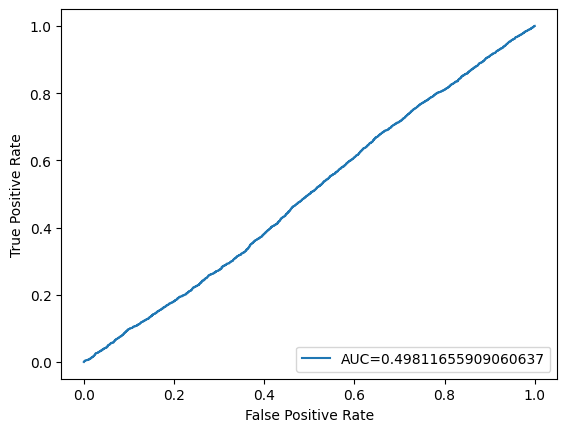

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31594
           1       0.00      0.00      0.00       321

    accuracy                           0.99     31915
   macro avg       0.49      0.50      0.50     31915
weighted avg       0.98      0.99      0.98     31915



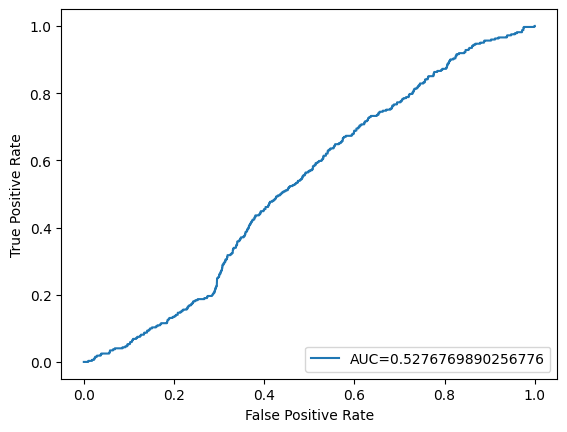

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     30200
           1       0.00      0.00      0.00      1715

    accuracy                           0.95     31915
   macro avg       0.47      0.50      0.49     31915
weighted avg       0.90      0.95      0.92     31915



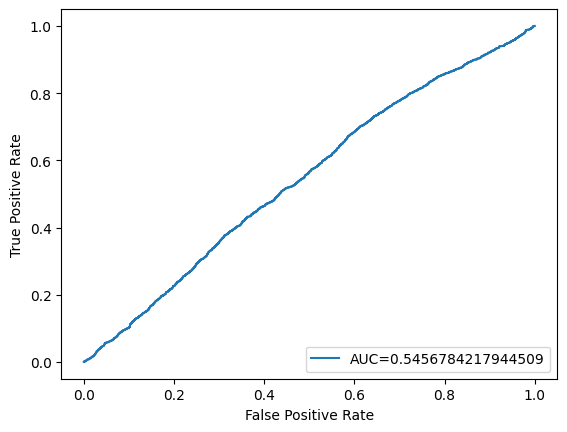

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31841
           1       0.00      0.00      0.00        74

    accuracy                           1.00     31915
   macro avg       0.50      0.50      0.50     31915
weighted avg       1.00      1.00      1.00     31915



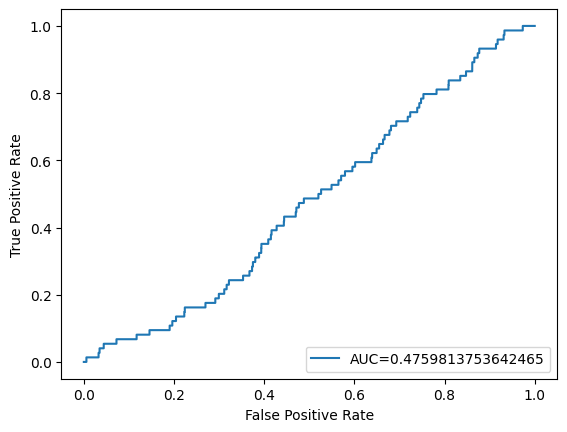

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     30301
           1       0.00      0.00      0.00      1614

    accuracy                           0.95     31915
   macro avg       0.47      0.50      0.49     31915
weighted avg       0.90      0.95      0.92     31915



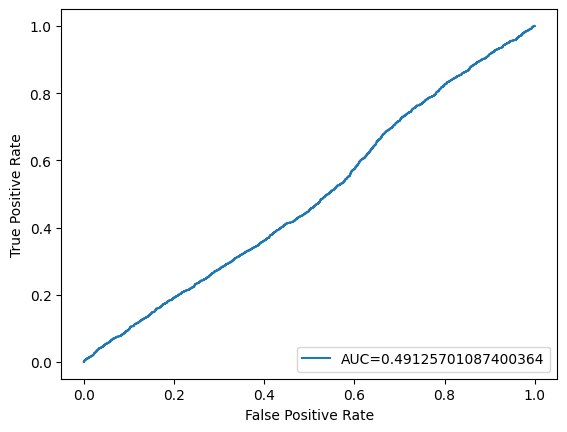

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31621
           1       0.00      0.00      0.00       294

    accuracy                           0.99     31915
   macro avg       0.50      0.50      0.50     31915
weighted avg       0.98      0.99      0.99     31915



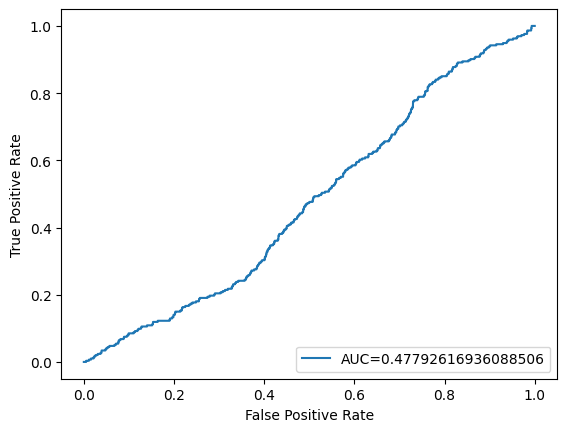

In [26]:
# Train a logistic regression model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
lr = LogisticRegression()
for label in columns:
  lr.fit(data_tfidf,y_train[label])
  y_pred = lr.predict_proba(test_data_tfidf)
  probs_lr[label]=y_pred[:,1]

  y_pred_val=lr.predict(val_tfidf)
  print(classification_report(y_valid[label],y_pred_val))

  y_pred_proba = lr.predict_proba(val_tfidf)[::,1]
  fpr, tpr, _ = roc_curve(y_valid[label],  y_pred_proba)
  auc=roc_auc_score(y_valid[label],  y_pred_proba)
  #create ROC curve
  plt.plot(fpr,tpr,label='AUC='+str(auc))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

In [27]:
probs_lr

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.978369,0.082813,0.976448,0.016775,0.855702,0.096552
1,0000247867823ef7,0.008919,0.002924,0.006506,0.001797,0.009283,0.003515
2,00013b17ad220c46,0.066045,0.006076,0.024779,0.002348,0.028051,0.005852
3,00017563c3f7919a,0.004376,0.001695,0.003243,0.001017,0.003605,0.001092
4,00017695ad8997eb,0.075565,0.005023,0.022173,0.002074,0.027245,0.004590
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.614081,0.004734,0.153359,0.002359,0.033413,0.004596
153160,fffd7a9a6eb32c16,0.076274,0.005615,0.024387,0.004223,0.036919,0.008876
153161,fffda9e8d6fafa9e,0.011986,0.003140,0.007323,0.001660,0.008548,0.003241
153162,fffe8f1340a79fc2,0.043828,0.003377,0.022256,0.002425,0.018453,0.008177


###Multinomial NB

In [28]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [29]:
columns=['id','toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
probs_mnb=pd.DataFrame(columns=columns)
probs_mnb['id']=test_data['id']

              precision    recall  f1-score   support

           0       0.88      0.35      0.50     28859
           1       0.08      0.53      0.14      3056

    accuracy                           0.37     31915
   macro avg       0.48      0.44      0.32     31915
weighted avg       0.80      0.37      0.46     31915



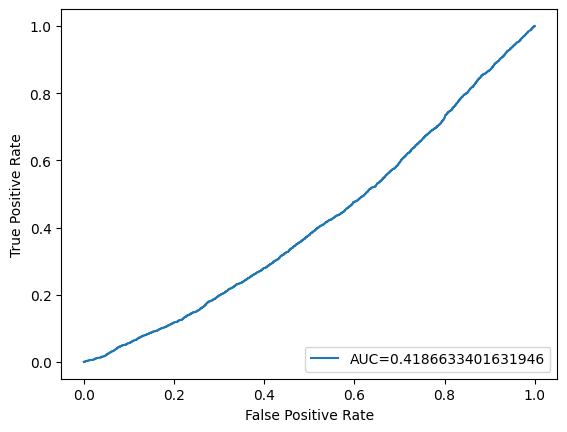

              precision    recall  f1-score   support

           0       0.99      0.65      0.78     31594
           1       0.00      0.10      0.01       321

    accuracy                           0.65     31915
   macro avg       0.49      0.38      0.40     31915
weighted avg       0.98      0.65      0.78     31915



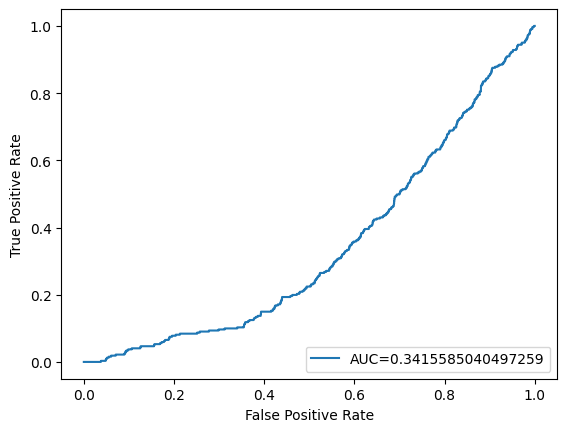

              precision    recall  f1-score   support

           0       0.93      0.42      0.57     30200
           1       0.04      0.44      0.08      1715

    accuracy                           0.42     31915
   macro avg       0.49      0.43      0.32     31915
weighted avg       0.88      0.42      0.55     31915



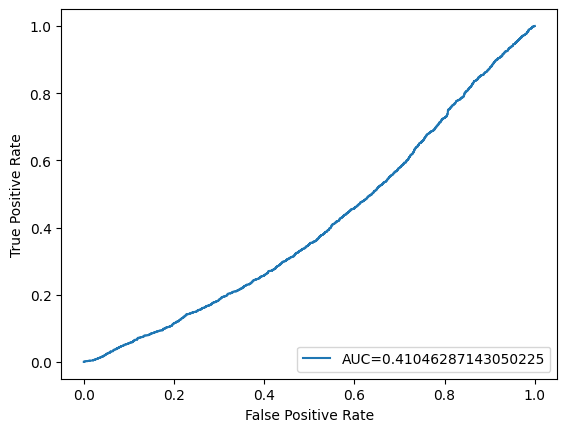

              precision    recall  f1-score   support

           0       1.00      0.80      0.89     31841
           1       0.00      0.07      0.00        74

    accuracy                           0.80     31915
   macro avg       0.50      0.43      0.44     31915
weighted avg       0.99      0.80      0.88     31915



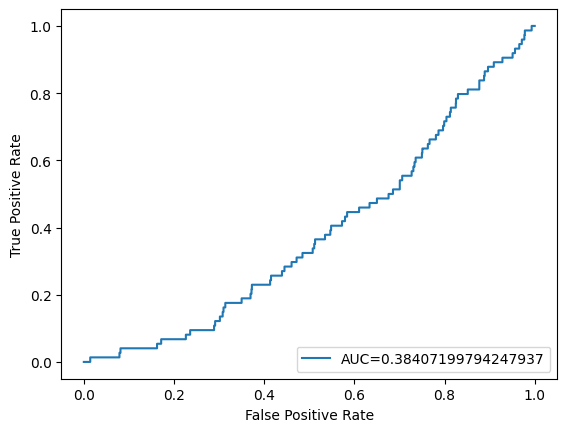

              precision    recall  f1-score   support

           0       0.93      0.42      0.58     30301
           1       0.04      0.43      0.07      1614

    accuracy                           0.42     31915
   macro avg       0.49      0.43      0.33     31915
weighted avg       0.89      0.42      0.55     31915



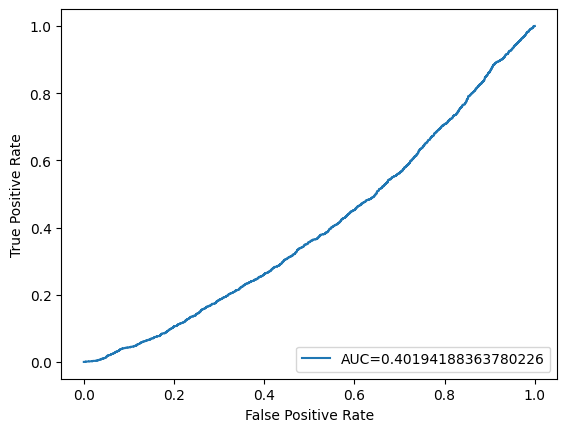

              precision    recall  f1-score   support

           0       0.99      0.67      0.80     31621
           1       0.01      0.20      0.01       294

    accuracy                           0.67     31915
   macro avg       0.50      0.44      0.41     31915
weighted avg       0.98      0.67      0.79     31915



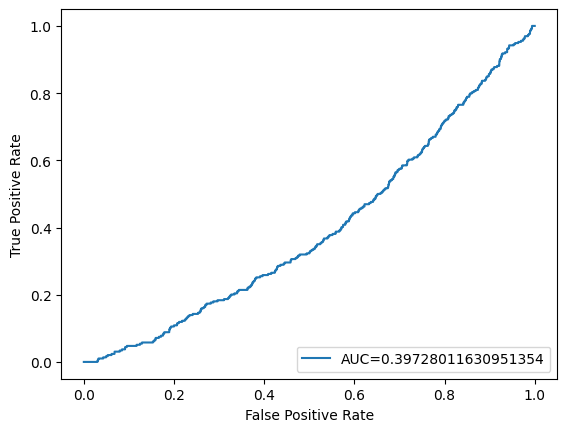

In [30]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for label in columns:
  mnb.fit(data_tfidf,y_train[label])
  y_pred = mnb.predict_proba(test_data_tfidf)
  probs_mnb[label]=y_pred[:,1]

  y_pred_val=mnb.predict(val_tfidf)
  print(classification_report(y_valid[label],y_pred_val))
  y_pred_proba = mnb.predict_proba(val_tfidf)[:,1]
  fpr, tpr, _ = roc_curve(y_valid[label],  y_pred_proba)
  auc=roc_auc_score(y_valid[label],  y_pred_proba)
  #create ROC curve
  plt.plot(fpr,tpr,label='AUC='+str(auc))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

In [31]:
probs_mnb

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.944132,0.002191,0.754360,0.000077,0.545569,0.001862
1,0000247867823ef7,0.004737,0.000081,0.001493,0.000026,0.001302,0.000095
2,00013b17ad220c46,0.362208,0.127006,0.319905,0.047299,0.312254,0.112527
3,00017563c3f7919a,0.002579,0.000007,0.000452,0.000001,0.000456,0.000005
4,00017695ad8997eb,0.083350,0.005056,0.034223,0.001256,0.032290,0.003617
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.081039,0.000061,0.011044,0.000010,0.006394,0.000060
153160,fffd7a9a6eb32c16,0.051383,0.000762,0.014280,0.000242,0.014705,0.001140
153161,fffda9e8d6fafa9e,0.006338,0.000162,0.001735,0.000058,0.001918,0.000197
153162,fffe8f1340a79fc2,0.035144,0.000262,0.008129,0.000099,0.006819,0.000736


### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)

In [33]:
columns=['id','toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
probs_rfc=pd.DataFrame(columns=columns)
probs_rfc['id']=test_data['id']

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     28859
           1       0.07      0.01      0.02      3056

    accuracy                           0.89     31915
   macro avg       0.49      0.50      0.48     31915
weighted avg       0.82      0.89      0.85     31915



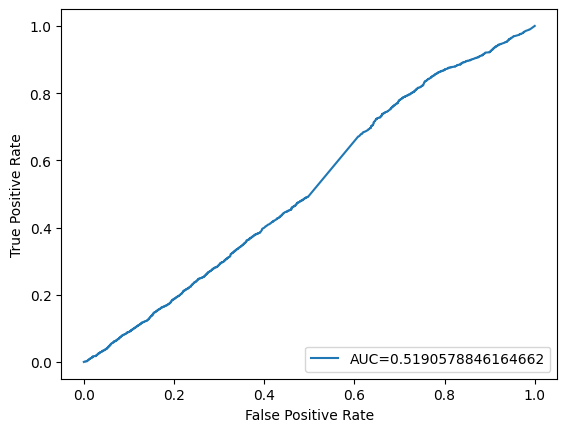

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31594
           1       0.00      0.00      0.00       321

    accuracy                           0.99     31915
   macro avg       0.49      0.50      0.50     31915
weighted avg       0.98      0.99      0.98     31915



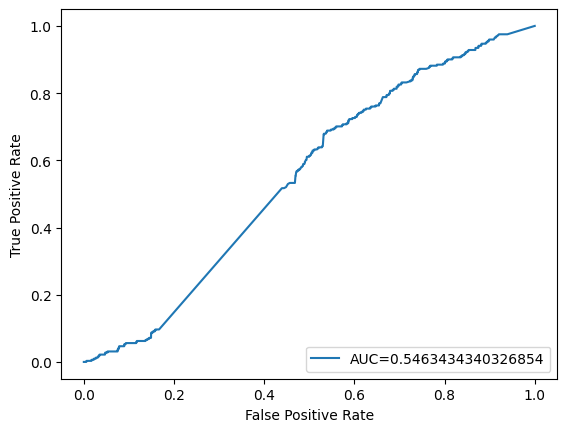

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     30200
           1       0.03      0.01      0.01      1715

    accuracy                           0.94     31915
   macro avg       0.49      0.50      0.49     31915
weighted avg       0.90      0.94      0.92     31915



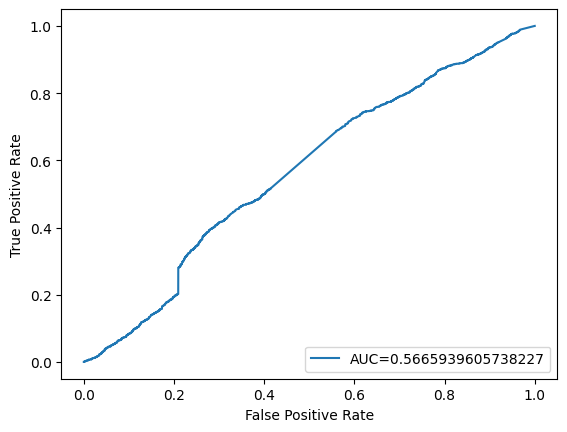

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31841
           1       0.00      0.00      0.00        74

    accuracy                           1.00     31915
   macro avg       0.50      0.50      0.50     31915
weighted avg       1.00      1.00      1.00     31915



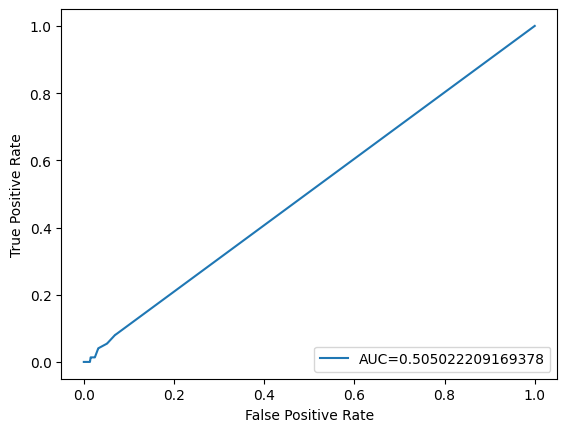

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     30301
           1       0.04      0.00      0.01      1614

    accuracy                           0.95     31915
   macro avg       0.50      0.50      0.49     31915
weighted avg       0.90      0.95      0.92     31915



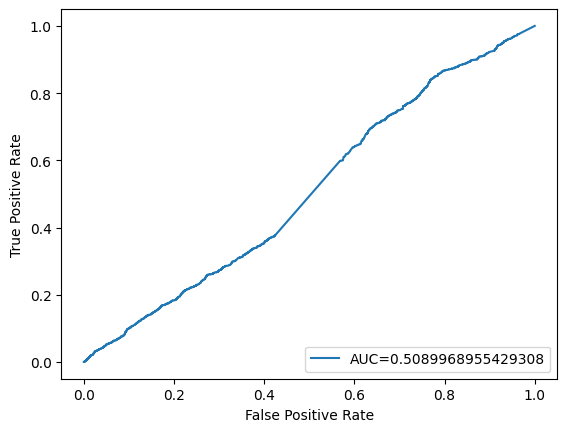

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31621
           1       0.00      0.00      0.00       294

    accuracy                           0.99     31915
   macro avg       0.50      0.50      0.50     31915
weighted avg       0.98      0.99      0.99     31915



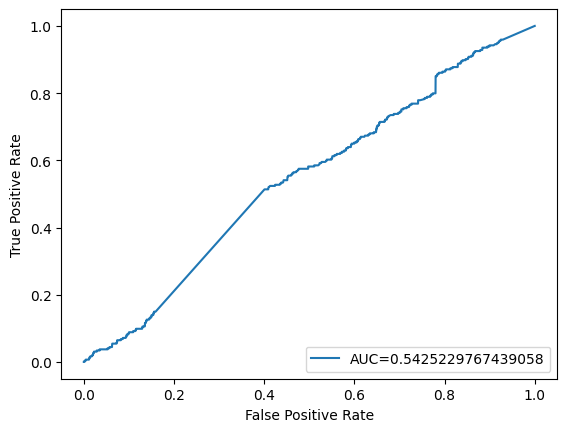

In [34]:
columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for label in columns:
  rfc.fit(data_tfidf,y_train[label])
  y_pred = rfc.predict_proba(test_data_tfidf)
  probs_rfc[label]=y_pred[:,1]

  y_pred_val=rfc.predict(val_tfidf)
  print(classification_report(y_valid[label],y_pred_val))
  y_pred_proba = rfc.predict_proba(val_tfidf)[:,1]
  fpr, tpr, _ = roc_curve(y_valid[label],  y_pred_proba)
  auc=roc_auc_score(y_valid[label],  y_pred_proba)
  #create ROC curve
  plt.plot(fpr,tpr,label='AUC='+str(auc))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

In [35]:
probs_rfc

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.810000,0.070000,0.850000,0.02,0.670000,0.080000
1,0000247867823ef7,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,00013b17ad220c46,0.075738,0.006447,0.040569,0.00,0.032415,0.010355
3,00017563c3f7919a,0.030000,0.000000,0.000000,0.00,0.050000,0.000000
4,00017695ad8997eb,0.020471,0.000000,0.000000,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.780000,0.000000,0.130000,0.00,0.060000,0.010000
153160,fffd7a9a6eb32c16,0.030000,0.000000,0.000000,0.00,0.000000,0.000000
153161,fffda9e8d6fafa9e,0.010000,0.000000,0.000000,0.00,0.000000,0.000000
153162,fffe8f1340a79fc2,0.010000,0.000000,0.000000,0.00,0.000000,0.000000


## probabilities of the test file

In [36]:
probs_lr.to_csv('prob_log_reg.csv')

In [37]:
probs_mnb.to_csv('prob_multi_nb.csv')

In [38]:
probs_rfc.to_csv('prob_ran_for.csv')